# introduction to neural network classfication with Tensorflow

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* MultiClass classification
* Multi-lable classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [3]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it!

In [4]:
# visualize the features
import pandas as pd

circles = pd.DataFrame({
    'X0': X[:,0],
    'X1': X[:, 1],
    'label': y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


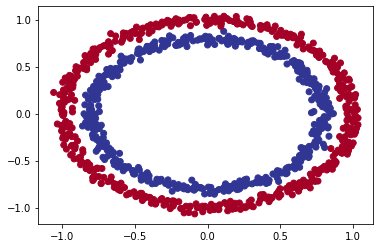

In [5]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(circles['X0'], circles['X1'], c=y, cmap=plt.cm.RdYlBu)

## input and output shape

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# view first example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## steps in modelling

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(800,2)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 4ms/step - loss: 0.6980 - accuracy: 0.5075
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5050
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.4888
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5013
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5000
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5025
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.5088
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.5150
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.5825
Epoch 11/50
25/25 [

In [11]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.9900


[0.4646824896335602, 0.9900000095367432]

In [12]:
# a not so good model

tf.random.set_seed(42)
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(100, input_shape=(None, 1)))
model_1.add(tf.keras.layers.Dense(10))
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [13]:
# define plot function
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1 # add some margin
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing multiclass classification


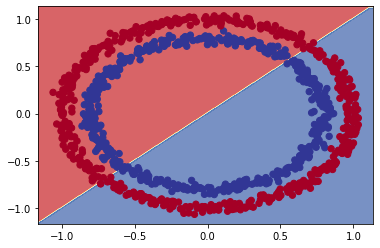

In [14]:
# check out the predictions our model is making
plot_decision_boundary(model_1, X, y)

In [15]:
# see if our model can be used in a regression problem
tf.random.set_seed(42)

X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:] 
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# fit our model to regression data
model_1.fit(tf.expand_dims(X_reg_train, -1), y_reg_train, epochs=100, verbose=0)
model_1.evaluate(tf.expand_dims(X_reg_test, -1), y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: -14814.6348 - accuracy: 0.0000e+00


[-14814.634765625, 0.0]

## the missing piece: non-linearity

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


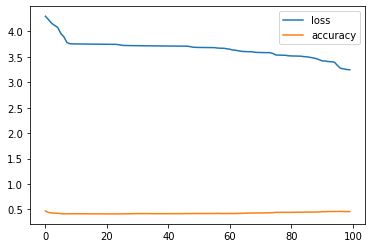

In [16]:
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation='linear'))

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100, verbose=0)
pd.DataFrame(history.history).plot()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


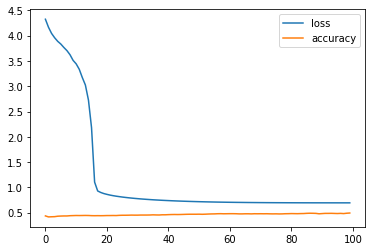

In [17]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(1, activation='relu'))

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100, verbose=0)
pd.DataFrame(history.history).plot()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9000


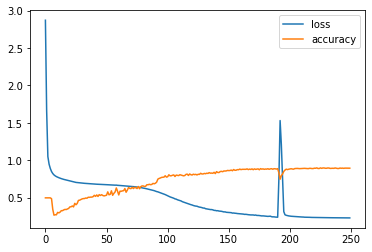

In [18]:
import tensorflow as tf
import pandas as pd

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4, activation='relu'))
model_6.add(tf.keras.layers.Dense(4, activation='relu'))
model_6.add(tf.keras.layers.Dense(1))

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=250, verbose=0)
model_6.evaluate(X_test, y_test)
pd.DataFrame(history.history).plot()

doing binary classification


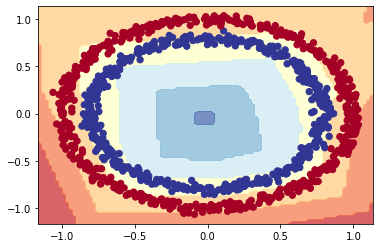

In [19]:
plot_decision_boundary(model_6, X, y)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9900


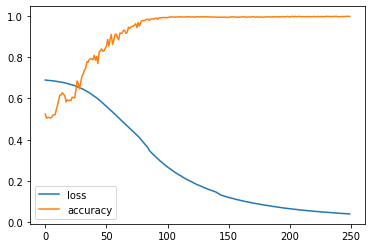

In [20]:
import tensorflow as tf
import pandas as pd

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4, activation='relu'))
model_7.add(tf.keras.layers.Dense(4, activation='relu'))
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=250, verbose=0)
model_7.evaluate(X_test, y_test)
pd.DataFrame(history.history).plot()

doing binary classification


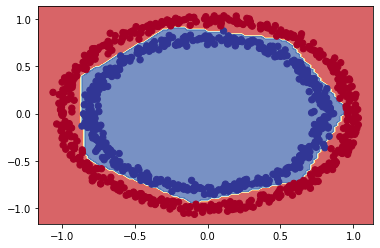

In [21]:
plot_decision_boundary(model_7, X, y)

> the combination of linear (straight lines) and none-linear (none-straight lines) functions is one of the key fundamentals of neural networks

In [22]:
# create a toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

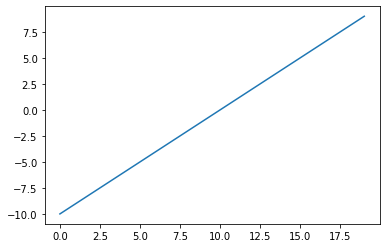

In [23]:
plt.plot(A)

In [24]:
# replicating sigmoid: sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

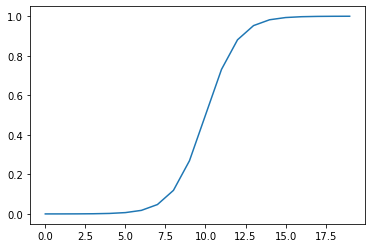

In [25]:
plt.plot(sigmoid(A))

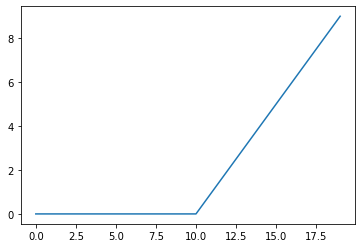

In [26]:
# define our own relu function, relu(x) = max(x, 0)

def relu(x):
  return tf.maximum(0,x)

plt.plot(relu(A))

In [27]:
# try linear activation, no any modification to original tensor
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## evaluating and improving our classification

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 - 0s - loss: 0.6857 - accuracy: 0.5300 - 473ms/epoch - 19ms/step
Epoch 2/25
25/25 - 0s - loss: 0.6749 - accuracy: 0.6488 - 36ms/epoch - 1ms/step
Epoch 3/25
25/25 - 0s - loss: 0.6631 - accuracy: 0.5750 - 36ms/epoch - 1ms/step
Epoch 4/25
25/25 - 0s - loss: 0.6508 - accuracy: 0.7175 - 35ms/epoch - 1ms/step
Epoch 5/25
25/25 - 0s - loss: 0.6289 - accuracy: 0.6737 - 35ms/epoch - 1ms/step
Epoch 6/25
25/25 - 0s - loss: 0.6018 - accuracy: 0.7337 - 35ms/epoch - 1ms/step
Epoch 7/25
25/25 - 0s - loss: 0.5687 - accuracy: 0.7500 - 48ms/epoch - 2ms/step
Epoch 8/25
25/25 - 0s - loss: 0.5374 - accuracy: 0.7538 - 35ms/epoch - 1ms/step
Epoch 9/25
25/25 - 0s - loss: 0.5061 - accuracy: 0.7875 - 38ms/epoch - 2ms/step
Epoch 10/25
25/25 - 0s - loss: 0.4594 - accuracy: 0.8313 - 35ms/epoch - 1ms/step
Epoch 11/25
25/25 - 0s - loss: 0.4063 - accuracy: 0.8888 - 38ms/epoch - 2ms/step
Epoch 12/25
25/25 - 0s - loss: 0.3693 - accuracy: 0.9162 - 38ms/epoch - 2ms/step
Epoch 13/25
25/25 - 0s - loss: 0.3418 - accura

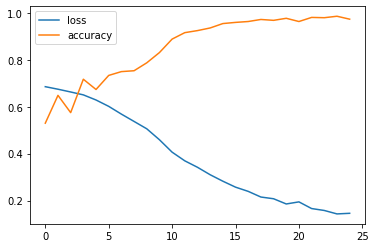

In [28]:
# improve the learning rate so that the model converge faster

import tensorflow as tf
import pandas as pd

model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4, activation='relu'))
model_8.add(tf.keras.layers.Dense(4, activation='relu'))
model_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train, y_train, epochs=25, verbose=2)
model_8.evaluate(X_test, y_test)
pd.DataFrame(history.history).plot()

doing binary classification
doing binary classification


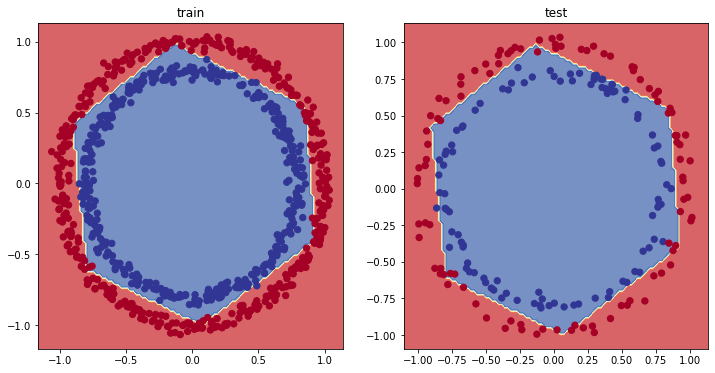

In [29]:
# plot the decision boundaries for training and testing 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_8, X_train, y_train)

plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_8, X_test, y_test)

plt.show()

In [30]:
history.history

{'accuracy': [0.5299999713897705,
  0.6487500071525574,
  0.574999988079071,
  0.7174999713897705,
  0.6737499833106995,
  0.7337499856948853,
  0.75,
  0.7537500262260437,
  0.7875000238418579,
  0.831250011920929,
  0.8887500166893005,
  0.9162499904632568,
  0.925000011920929,
  0.9362499713897705,
  0.9549999833106995,
  0.9599999785423279,
  0.9637500047683716,
  0.9725000262260437,
  0.96875,
  0.9775000214576721,
  0.9637500047683716,
  0.981249988079071,
  0.9800000190734863,
  0.9862499833106995,
  0.9737499952316284],
 'loss': [0.6857070326805115,
  0.6749051809310913,
  0.6631202101707458,
  0.6507777571678162,
  0.6289037466049194,
  0.601783812046051,
  0.5686689019203186,
  0.5374325513839722,
  0.5060641765594482,
  0.4593677818775177,
  0.4063262641429901,
  0.36934807896614075,
  0.34181851148605347,
  0.310022234916687,
  0.2824559509754181,
  0.25706547498703003,
  0.23905250430107117,
  0.21489427983760834,
  0.20755408704280853,
  0.18529969453811646,
  0.194212570

In [31]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.685707,0.53000
1,0.674905,0.64875
2,0.663120,0.57500
3,0.650778,0.71750
4,0.628904,0.67375
5,0.601784,0.73375
6,0.568669,0.75000
7,0.537433,0.75375
8,0.506064,0.78750
9,0.459368,0.83125


Text(0.5, 1.0, 'model 8 loss curves')

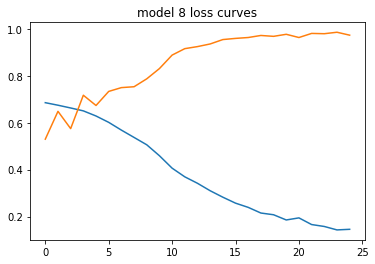

In [32]:
# pd.DataFrame(history.history).plot()
plt.plot(pd.DataFrame(history.history))
plt.title('model 8 loss curves')

> for many problems, the loss function going down, means the model is improving (the prediction are getting closer to the ground truth)

## finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate **callback** - you can think callback as an extra piece of functionality, you can add to your model while it is training
* Another model (we could use the same one as above, but we are practicing
* a modified loss curves plot

In [33]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(4, activation='relu'))
model_9.add(tf.keras.layers.Dense(4, activation='relu'))
model_9.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])
model_9.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

[0.9560865163803101, 0.5]

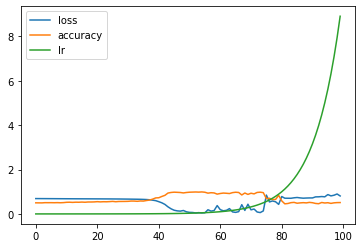

In [34]:
pd.DataFrame(history.history).plot()

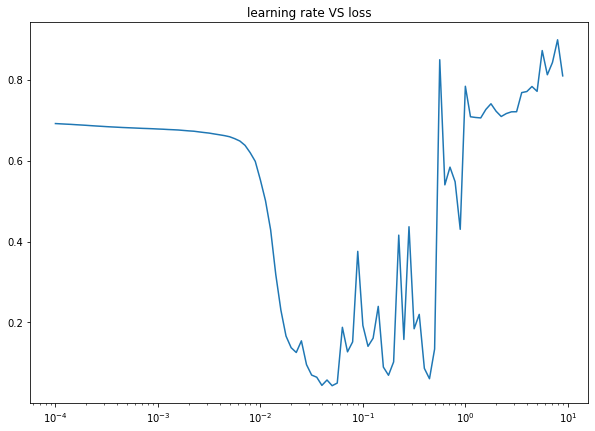

In [35]:
# plot the learning rate versus the loss
lrs = 1e-4 * 10**(tf.range(100)/20)

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlable='learning rate'
plt.ylable='loss'
plt.title('learning rate VS loss')
plt.show()

In [36]:
# example of other typical leanrng rates values:
1, 1e-1, 1e-2, 1e-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Epoch 1/23


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/23
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/23
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/23
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/23
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/23
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/23
25/25 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/23
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/23
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/23
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/23
25/25 [===========

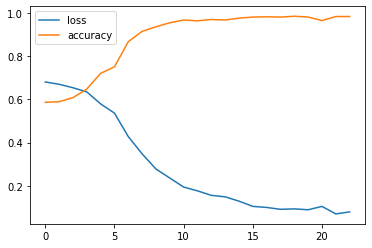

In [37]:
# try using a higher ideal learning rate with the same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(4, activation='relu'))
model_10.add(tf.keras.layers.Dense(4, activation='relu'))
model_10.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# Create a learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_10.fit(X_train, y_train, epochs=23)
model_10.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot()

## More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [38]:
# check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)

print(f'Model loss on the test set: {loss}')
print(f'Model accuracy of the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9900
Model loss on the test set: 0.10163960605859756
Model accuracy of the test set: 99.00%


## how about a confusion matrix

In [39]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)
y_preds[:10]

array([[0.9963604 ],
       [0.2143808 ],
       [0.99488926],
       [0.0089165 ],
       [0.57469   ],
       [0.6963489 ],
       [0.00958493],
       [0.01025304],
       [0.9733473 ],
       [0.09089574]], dtype=float32)

> our predictions array come out in prediction probability form... the stadnard output from the sigmoid (or softmax) activation functions

In [40]:
# convert prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [41]:
cm = confusion_matrix(y_test, tf.round(y_preds))
cm

array([[100,   0],
       [  2,  98]])

## try to prettify our confusion matrix

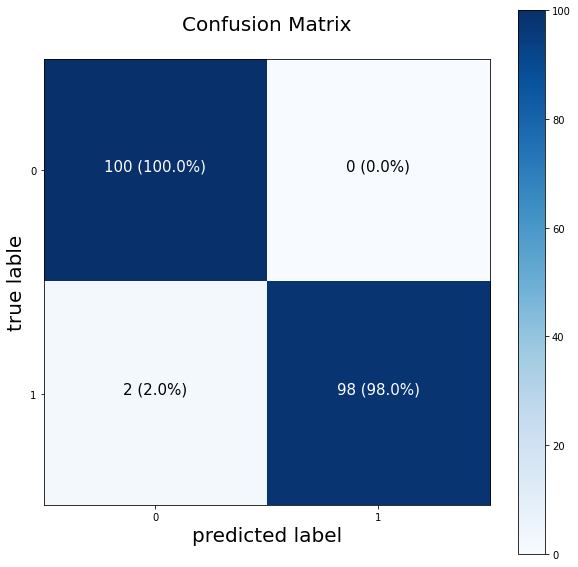

In [42]:
import itertools

figsize = (10,10)
cm_norm = cm / cm.sum(axis=1)
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classses
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='predicted label',
       ylabel='true lable',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# adjust lable size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black',
           size=15)


# working with a larger example (multiclass classification)

when you have more than 2 classes as option, it's known as **multi-class classification**

* This means if you have 3 different classes, it is multi-class
* if you have 100 different classes, it's also multi-class

We are going to build a neural network to classify images of different items of clothing.


In [43]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and testing set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [44]:
# check the shape
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [45]:
# show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'training lable:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

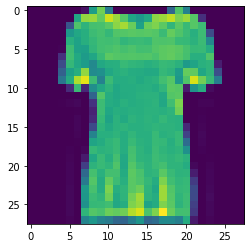

In [46]:
# plot a single sample
plt.imshow(train_data[10])

In [47]:
# create a small list so we can index onto our training labels so they're human readable
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

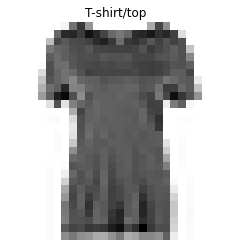

In [48]:
# Plot an example image and its label
def img_plot(index):
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])
  plt.axis(False)

index = 10
img_plot(index)

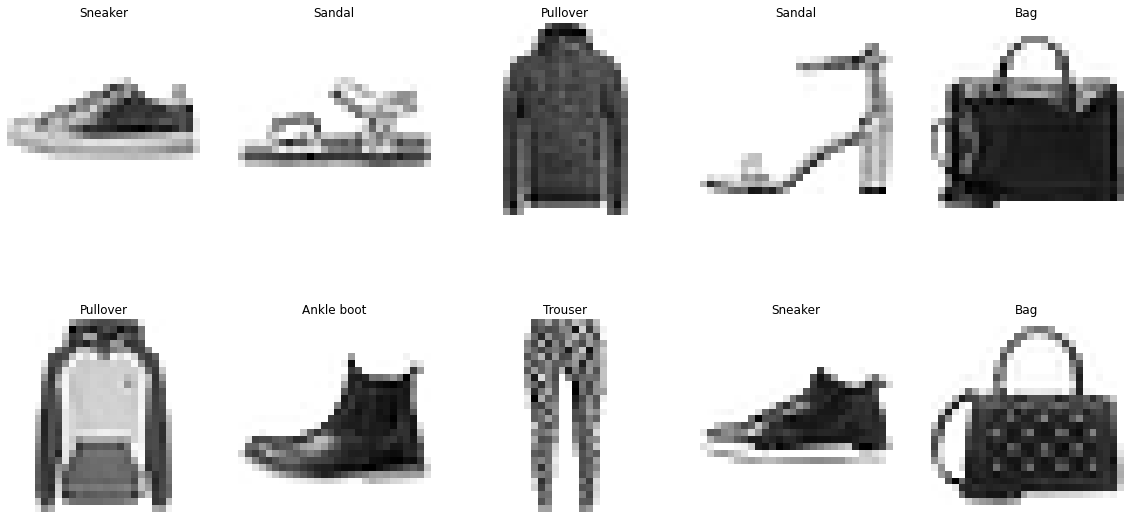

In [49]:
# plot multiple random images of fashion mnist
import random
plt.figure(figsize=(20,10))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  # rand_index = random.choice(range(len(train_data)))
  rand_index = random.randint(0, len(train_data)-1)
  img_plot(rand_index)

## Building a multi-class classification model

for our multiclass model, we can use a similar architecture to our binary classifiers, however, we are going to tweak a few things:
* Input shape - 28 x 28 (the shape of one image)
* Loss function - categorical_crossentropy
  * if your labels are one-hot encoded, use the categoricalcrossentropy, otherwise, use the sparse-
* output activation - softmax (not sigmoid)
* output shape - 10 (one per class of clothing)





In [50]:
flatten_model = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28))
])

flatten_model.output_shape

(None, 784)

In [51]:
28**2

784

In [52]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [53]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten()) # normally you need to flatten the input data into long vector
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# tradition "categorical_crossentropy" need one hot encode of the label data, 
# you can use "sparse_categorical_crossentropy" for integer data

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

> the above accuracy is better than pure guessing, since we have 10 class, the posibility is 10%

In [54]:
# check the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [55]:
train_data.min(), train_data.max(), train_data.mean()

(0, 255, 72.94035223214286)

Neural network prefer data to be normalized (between 0 and 1)

In [56]:
# we can get our training and testing data between 0 and 1 by dividing the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max(), train_data_norm.mean()

(0.0, 1.0, 0.2860405969887955)

In [57]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_norm = model_1.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> neural network tend to prefer data in numerical form as well as normalized (0-1)

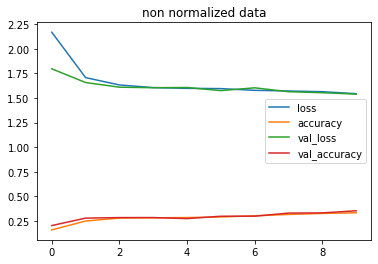

In [58]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title='non normalized data')

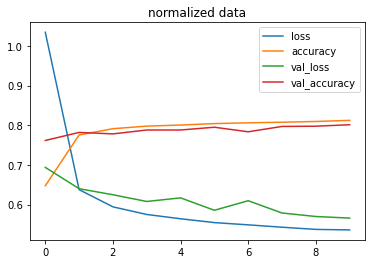

In [59]:
pd.DataFrame(history_norm.history).plot(title='normalized data')

> The same model with even slightly different data can produce dramatically different results

## finding optimized learning rate

In [60]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_lr = model_2.fit(train_data_norm, train_labels, epochs=20, callbacks=[lr_scheduler], validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6s

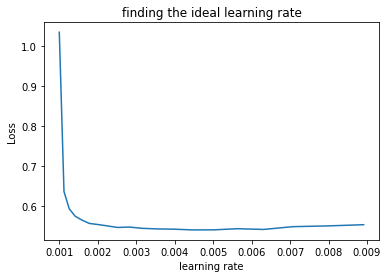

In [61]:
import numpy as np

# lrs = 1e-3 * (10**(tf.range(20)/20))
# plt.semilogx(lrs, history_lr.history['loss'])
# plt.plot(lrs, history_lr.history['loss'])
plt.plot(history_lr.history['lr'], history_lr.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('Loss')
plt.title('finding the ideal learning rate')
plt.show()

> The optimized learning rate shall be somewhere at 1e-3

In [62]:
# refit the model with ideal learning rate
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## evaluating our multi-class classification model

* Evaluate its performance using other metrics (such as confusion matrix
* Assess some of its predictions through visualization

In [63]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(test_labels, model_3.predict(test_data_norm))
model_3.predict(test_data_norm)

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, ...,
        4.38645892e-02, 4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, ...,
        0.00000000e+00, 4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, ...,
        1.22946607e-16, 5.29575495e-08, 6.05440481e-12],
       ...,
       [1.69975817e-01, 1.17580357e-05, 7.96689466e-02, ...,
        2.98912904e-29, 5.22433259e-02, 4.48134427e-15],
       [1.14954219e-05, 9.97435153e-01, 1.55415307e-07, ...,
        1.05385510e-15, 2.33017374e-07, 1.71179432e-10],
       [8.86718752e-08, 1.23651303e-08, 5.53219761e-05, ...,
        5.15673030e-03, 3.81294492e-04, 4.57163202e-03]], dtype=float32)

In [64]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm / cm.sum(axis=1)
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title='Confusion Matrix',
        xlabel='predicted label',
        ylabel='true lable',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # adjust lable size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=text_size)

In [65]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [66]:
# make some predictions
y_probs = model_3.predict(test_data_norm)

y_probs[:5]

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, 5.13161808e-07,
        1.81152336e-05, 2.97060341e-01, 4.20026289e-08, 4.38645892e-02,
        4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, 7.29073406e-07,
        2.47242767e-02, 4.15087470e-17, 6.74995705e-02, 0.00000000e+00,
        4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, 1.42850075e-03,
        1.54846366e-05, 6.91499768e-22, 7.37811524e-06, 1.22946607e-16,
        5.29575495e-08, 6.05440481e-12],
       [4.30087748e-05, 9.96566236e-01, 7.15737315e-07, 3.24998843e-03,
        1.19078315e-04, 2.16415290e-19, 2.04281223e-05, 5.03702372e-14,
        6.17275475e-07, 1.14019505e-09],
       [1.47298977e-01, 2.39545761e-06, 1.33107737e-01, 1.01817297e-02,
        3.32404375e-02, 4.55808943e-18, 6.75670624e-01, 2.75189509e-29,
        4.98094480e-04, 1.62312739e-14]], dtype=float32)

> remember to make predictions on the same kind of data your model was trained on. e.g. if model is trained using normalized data, you shall predict on the same normalized data

In [67]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.7880183e-10, 8.5933510e-11, 1.4691766e-05, 5.1316181e-07,
        1.8115234e-05, 2.9706034e-01, 4.2002629e-08, 4.3864589e-02,
        4.0301597e-03, 6.5501159e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [68]:
# convert all of the predictions to integers
# y_pred = y_probs.argmax(axis=1)
y_pred = tf.argmax(y_probs, axis=1)
y_pred[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>

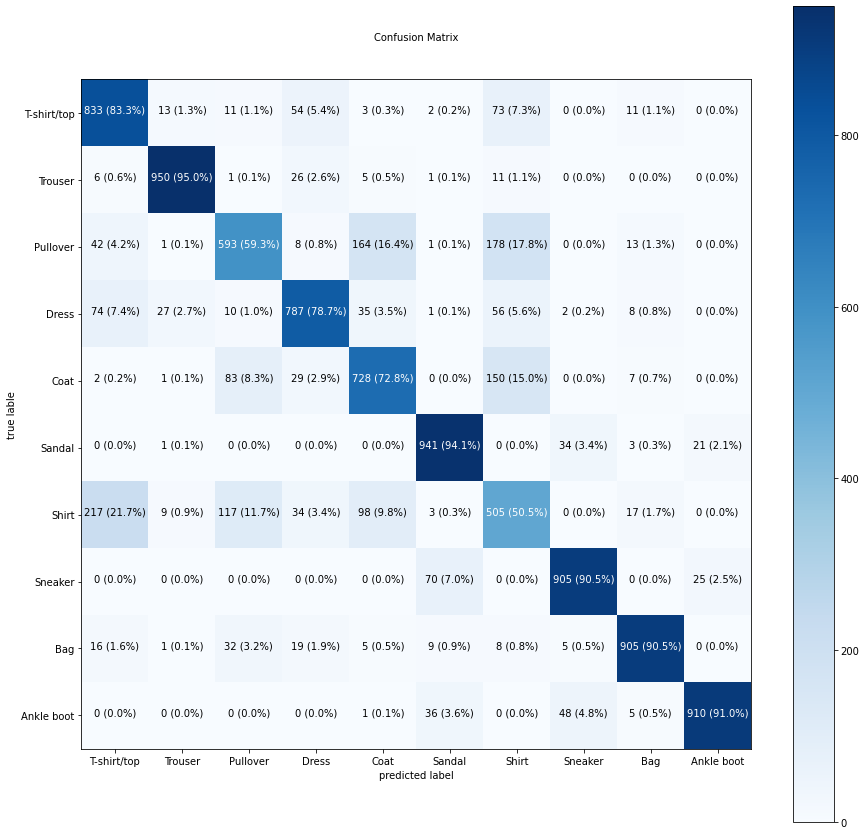

In [69]:
make_confusion_matrix(test_labels, y_pred,classes=class_names, text_size=10, figsize=(15,15))

> 🔑 often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data, and the inputs and outputs of your models

how about we create a fun little function for:
* plot a random image
* make prediction on said image
* label the plot with the truth lable and the prediction label

In [70]:
y_pred = model_3.predict(test_data_norm).argmax(axis=1)

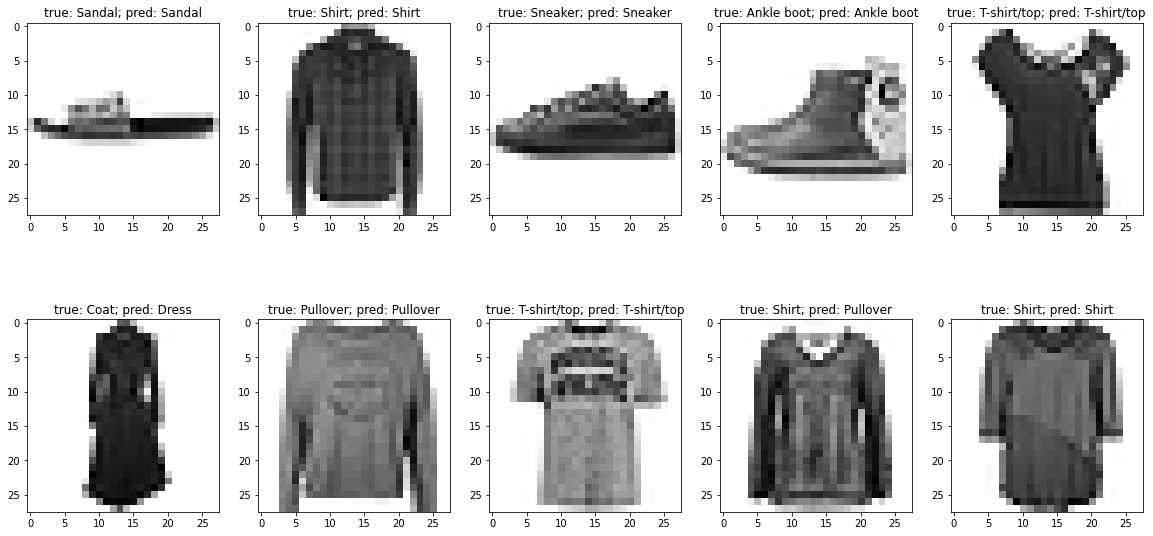

In [71]:
def plot_img_with_pred(y_pred):
  plt.figure(figsize=(20,10))
  for i in range(10):
    plt.subplot(2,5,i+1)
    index = random.randint(0, 10000-1)
    plt.imshow(test_data[index], cmap=plt.cm.binary)
    title = 'true: {}; pred: {}'.format(class_names[test_labels[index]], 
                                        class_names[y_pred[index]]
                                        )
    plt.title(title)

plot_img_with_pred(y_pred)

In [72]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0,len(images))

  # create predictions and target
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color depending on the result correctness
  color = 'green' if pred_label == true_label else 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                              100 * tf.reduce_max(pred_prob),
                                              true_label),
             color=color)

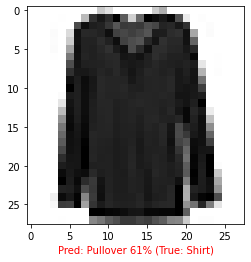

In [73]:
plot_random_image(model=model_3,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## what patterns is our model learning

In [74]:
# find layers of our model
model_3.layers

In [75]:
model_3.layers[1]

In [78]:
# get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# shapes
weights, weights.shape 

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))

In [79]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 4)                 3140      
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Now let's checkout the bias vector

In [80]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.3281791 , -0.01041772, -0.1584291 ,  1.2009073 ], dtype=float32),
 (4,))

Every nueron has bias vector, each of these is paired with a weights matric

the bias vector get initialized as zeros (at least in the case of tensorflow Dense layer)

the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

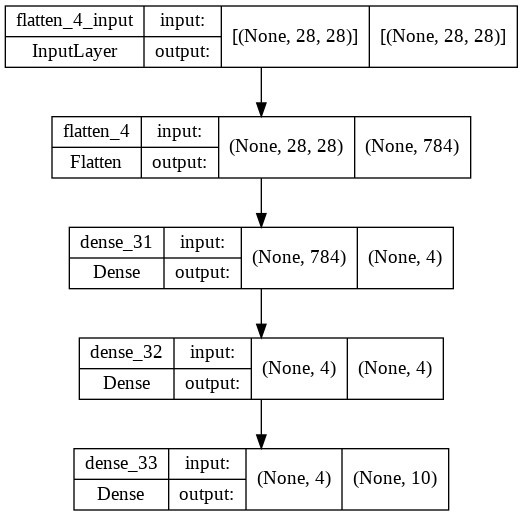

In [81]:
# another way of viewing our model
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)